In [79]:
import numpy as np
import matplotlib.pyplot as plt

In [80]:
def f1(x):
    return np.sin(2*x) 

In [81]:
def f2(x):
    return np.abs(2*x - 1)

In [82]:
def equidistant_nodes(a, b, n):
    return np.linspace(a, b, n + 1)

In [83]:
def chebyshev_nodes(a, b, n):
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(n + 1) + 1) / (2 * (n + 1)) * np.pi)

In [84]:
def divided_differences(x, y):
    n = len(x)
    coef = np.array(y, copy=True)
    for j in range(1, n):
        coef[j:] = (coef[j:] - coef[j - 1:-1]) / (x[j:] - x[:-j])
    return coef

In [85]:
def newton_polynomial(x, coef, x_val):
    n = len(coef)
    result = coef[-1]
    for i in range(n - 2, -1, -1):
        result = result * (x_val - x[i]) + coef[i]
    return result

In [86]:
def plot_graphs(x_points, y_points, x_dense, y_dense, p_dense, title):
    plt.figure(figsize=(8, 6))
    plt.plot(x_dense, y_dense, label="Исходная функция", color="black")
    plt.plot(x_dense, p_dense, label="Интерполяционный многочлен", linestyle="--", color="red")
    plt.axhline(0, linestyle = "--", color= "black")
    plt.scatter(x_points, y_points, color="blue", label="Узлы интерполяции")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

In [87]:
def calculate_error(f, p_dense, x_dense):
    return np.max(np.abs(f(x_dense) - p_dense))

In [88]:
def main():
    a, b = -2, 2  # Интервал интерполяции
    n_values = [5, 10, 15, 20, 30]  # Степени интерполяционных многочленов
    x_dense = np.linspace(a, b, 101)  # Плотные точки для построения графиков
    f_list = [f1, f2]  # Список функций
    function_names = ["f1(x) = sin(2x)", "f2(x) = |2x - 1|"]  # Названия функций

    for i, f in enumerate(f_list):
        print(f"Функция {function_names[i]}:")
        
        for n in n_values:
            print(f"n = {n}:")
            
            # Равноотстоящие узлы
            x_equidistant = equidistant_nodes(a, b, n)
            y_equidistant = f(x_equidistant)
            coef_equidistant = divided_differences(x_equidistant, y_equidistant)
            p_equidistant_dense = np.array([newton_polynomial(x_equidistant, coef_equidistant, xi) for xi in x_dense])
            
            # Чебышёвские узлы
            x_chebyshev = chebyshev_nodes(a, b, n)
            y_chebyshev = f(x_chebyshev)
            coef_chebyshev = divided_differences(x_chebyshev, y_chebyshev)
            p_chebyshev_dense = np.array([newton_polynomial(x_chebyshev, coef_chebyshev, xi) for xi in x_dense])
            
            # Вычисление погрешности
            error_equidistant = calculate_error(f, p_equidistant_dense, x_dense)
            error_chebyshev = calculate_error(f, p_chebyshev_dense, x_dense)
            
            print(f"  Погрешность для равноотстоящих узлов: {error_equidistant:.20f}")
            print(f"  Погрешность для чебышёвских узлов: {error_chebyshev:.20f}")
            
            # Построение графиков
            plot_graphs(x_equidistant, y_equidistant, x_dense, f(x_dense), p_equidistant_dense, 
                        f"Функция {function_names[i]} и P{i+1},{n} (равноотстоящие узлы)")
            plot_graphs(x_chebyshev, y_chebyshev, x_dense, f(x_dense), p_chebyshev_dense, 
                        f"Функция {function_names[i]} и C{i+1},{n} (чебышёвские узлы)")

Функция f1(x) = sin(2x):
n = 5:
  Погрешность для равноотстоящих узлов: 0.11956110947830383973
  Погрешность для чебышёвских узлов: 0.05709240719359964800


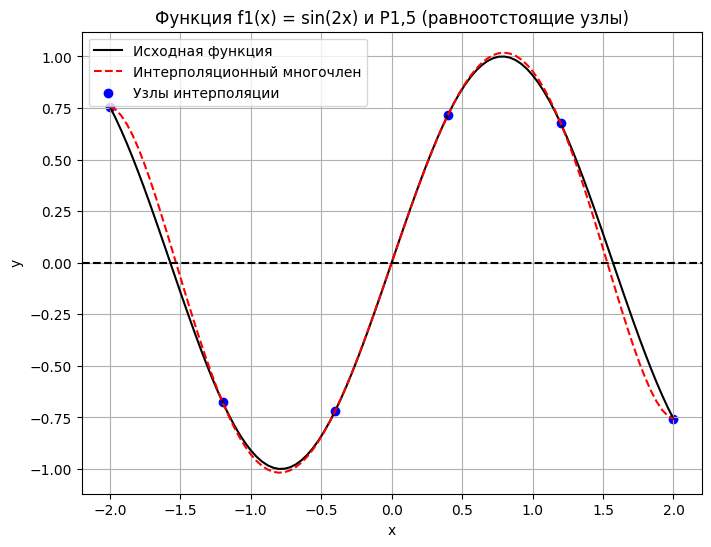

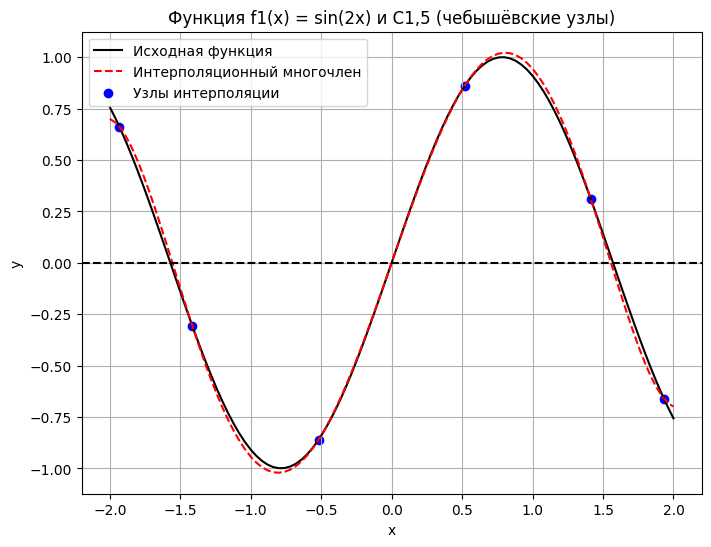

n = 10:
  Погрешность для равноотстоящих узлов: 0.00064996731741151503
  Погрешность для чебышёвских узлов: 0.00007703191685770605


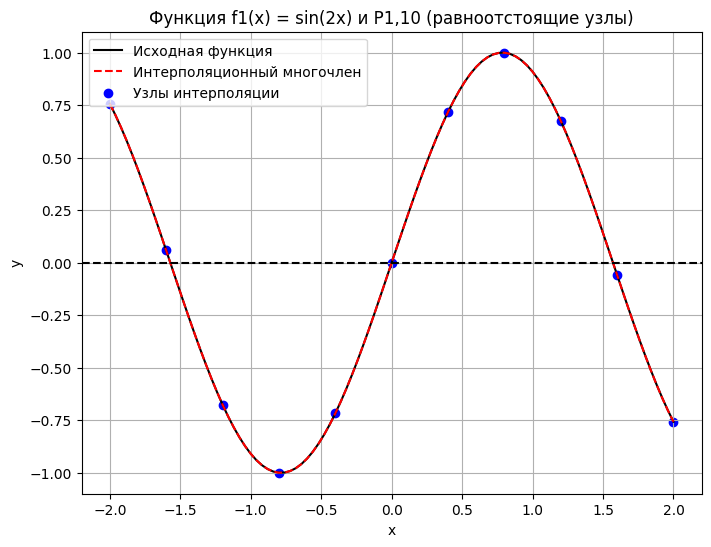

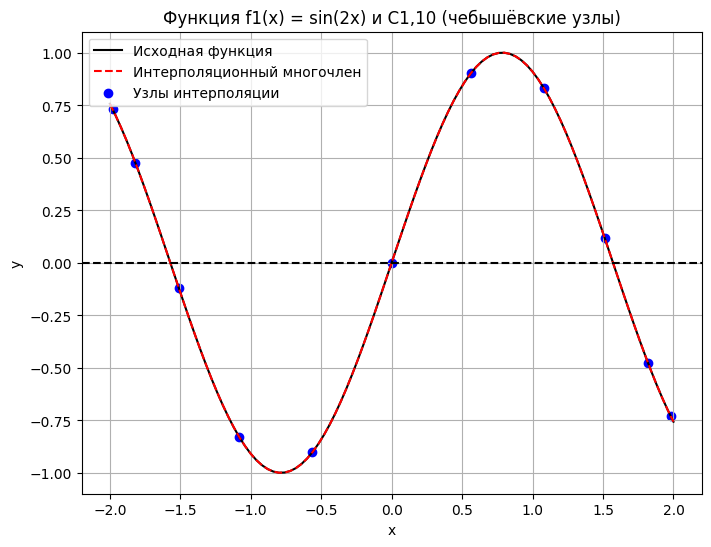

n = 15:
  Погрешность для равноотстоящих узлов: 0.00000005120730517394
  Погрешность для чебышёвских узлов: 0.00000000116477605339


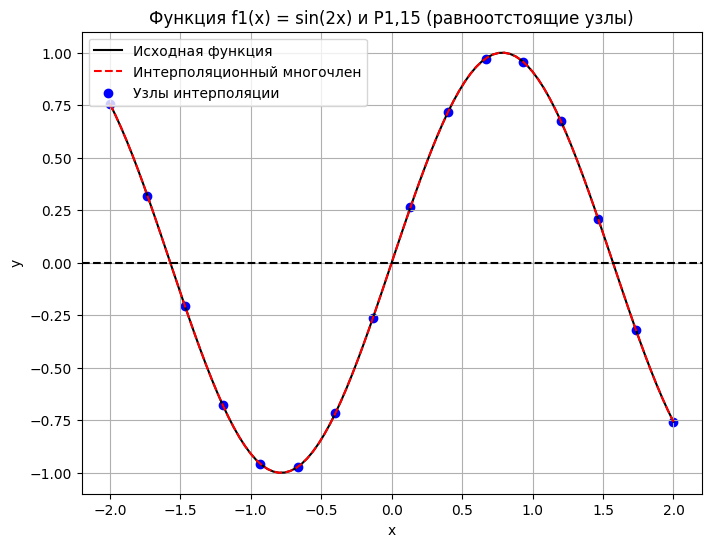

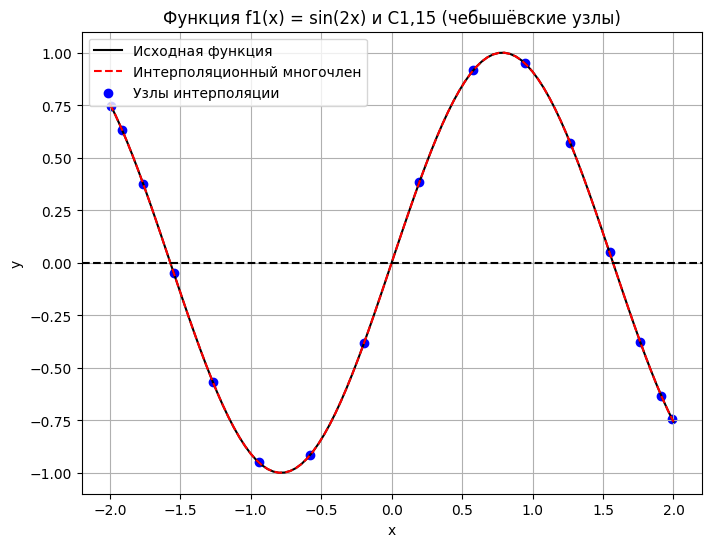

n = 20:
  Погрешность для равноотстоящих узлов: 0.00000000001705413588
  Погрешность для чебышёвских узлов: 0.00000000000007457923


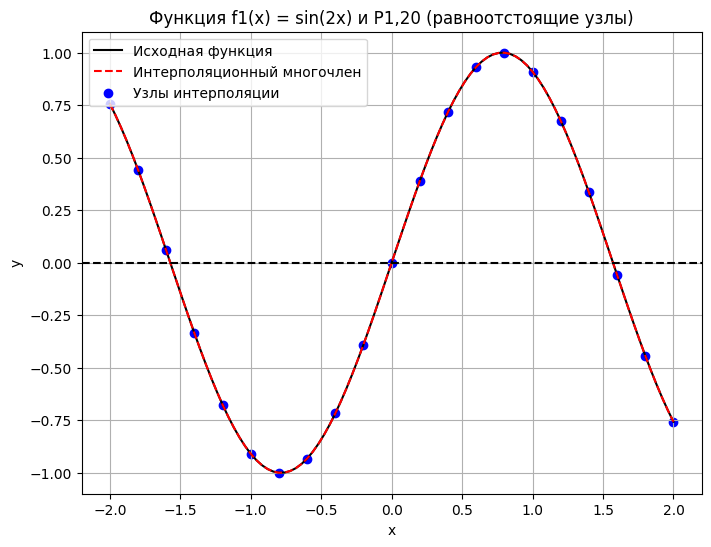

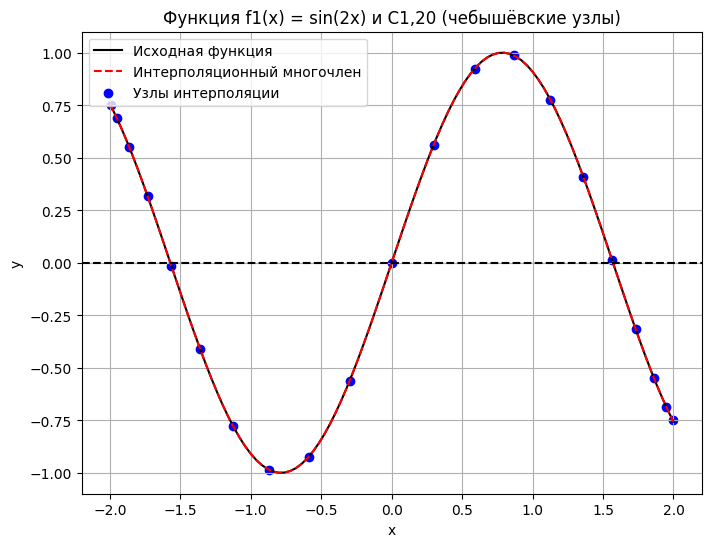

n = 30:
  Погрешность для равноотстоящих узлов: 0.00000000006274536446
  Погрешность для чебышёвских узлов: 0.00000000000005451195


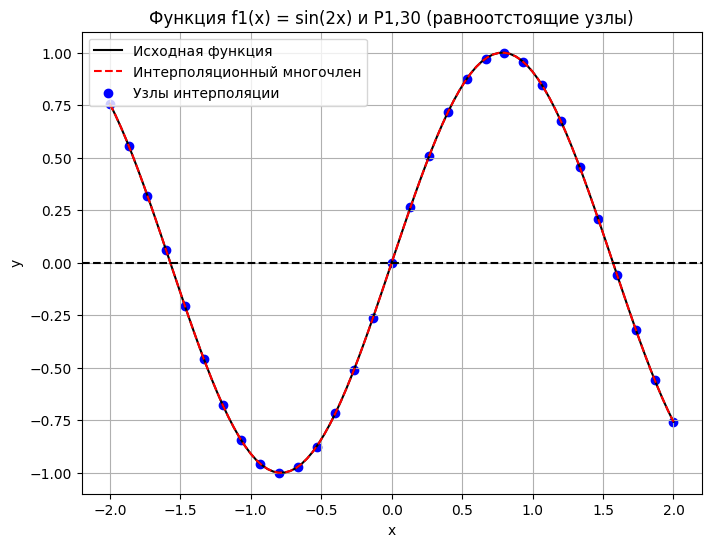

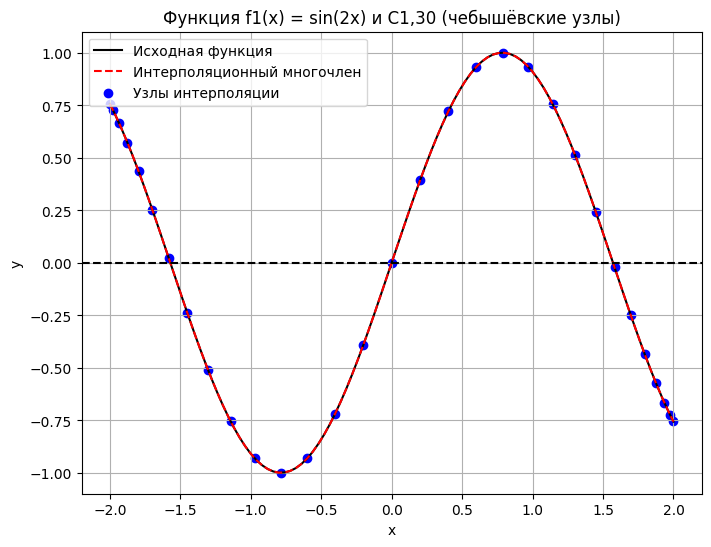

Функция f2(x) = |2x - 1|:
n = 5:
  Погрешность для равноотстоящих узлов: 0.56223212500000041558
  Погрешность для чебышёвских узлов: 0.41664931147514305820


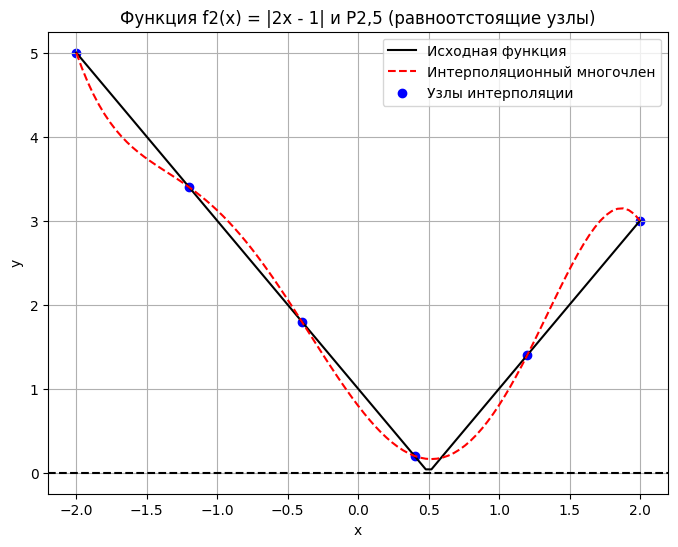

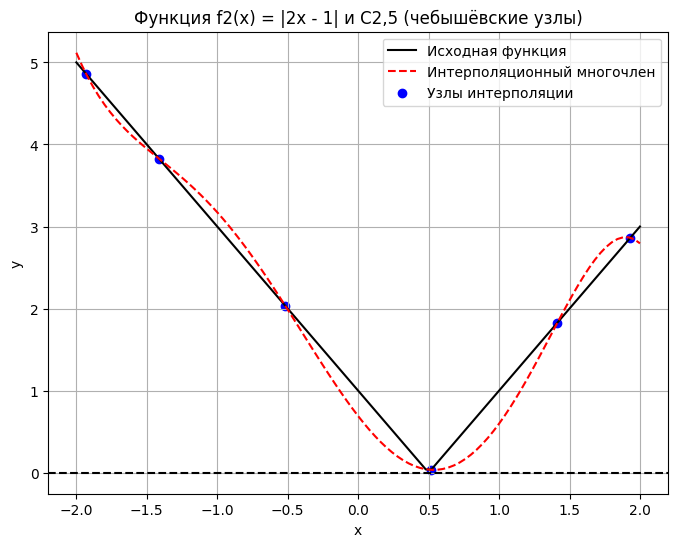

n = 10:
  Погрешность для равноотстоящих узлов: 1.59543473910636812718
  Погрешность для чебышёвских узлов: 0.18207670666662778558


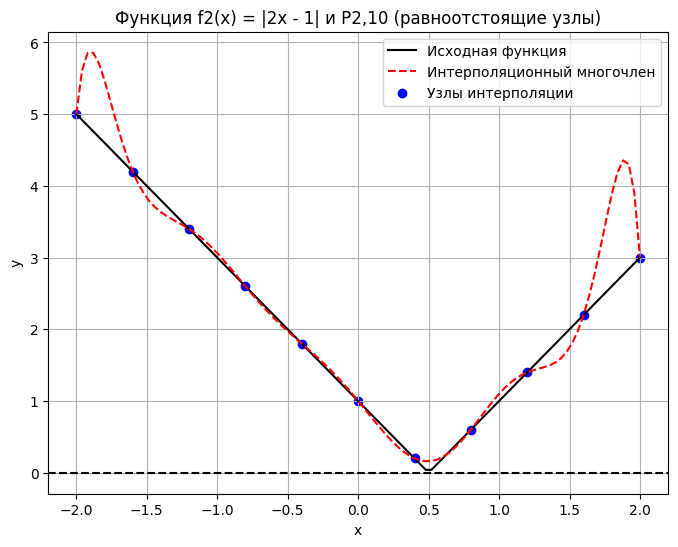

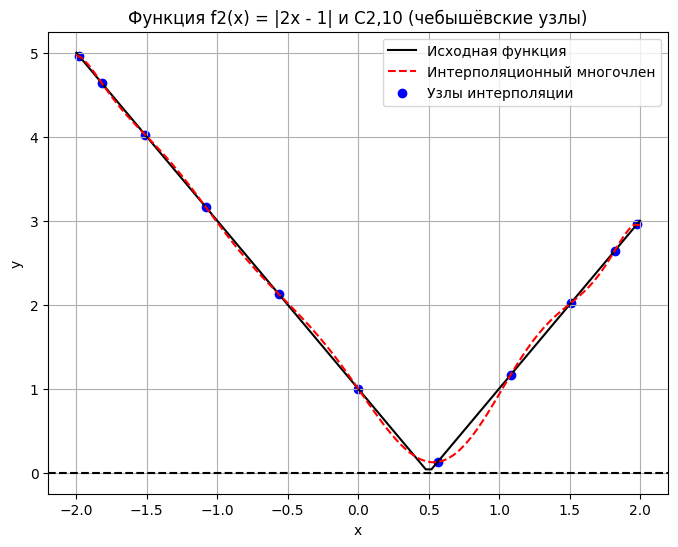

n = 15:
  Погрешность для равноотстоящих узлов: 9.11321621187037678169
  Погрешность для чебышёвских узлов: 0.12162647131358461650


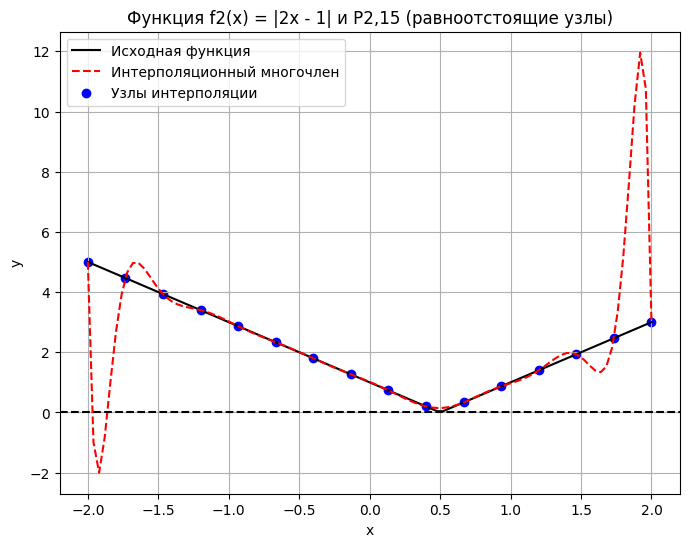

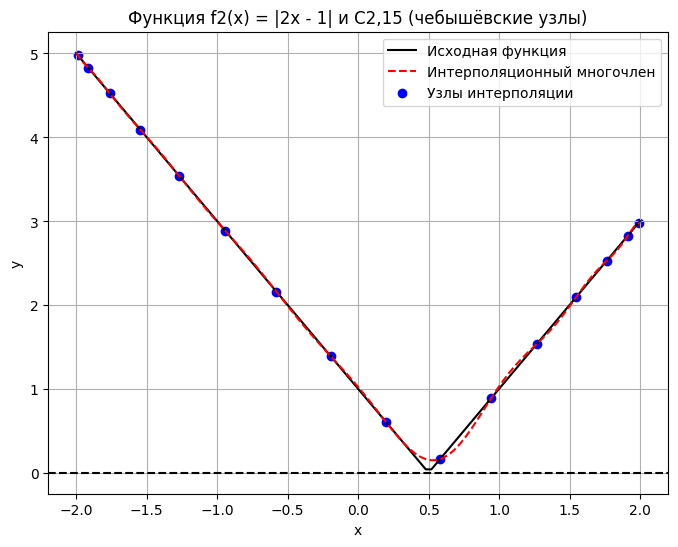

n = 20:
  Погрешность для равноотстоящих узлов: 49.79510728206425085318
  Погрешность для чебышёвских узлов: 0.12222509523196478654


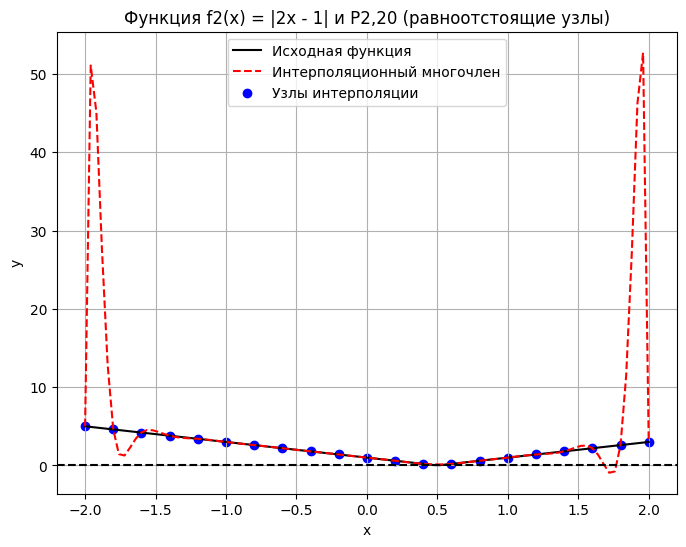

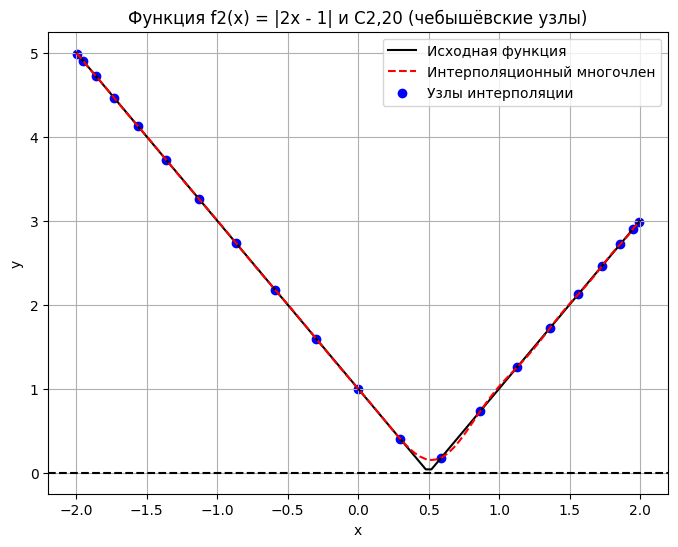

n = 30:
  Погрешность для равноотстоящих узлов: 21033.66834840255978633650
  Погрешность для чебышёвских узлов: 0.08818760386804624929


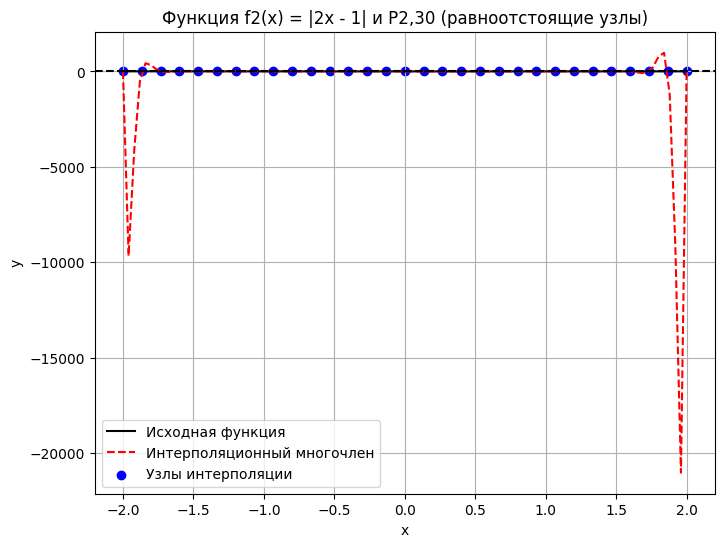

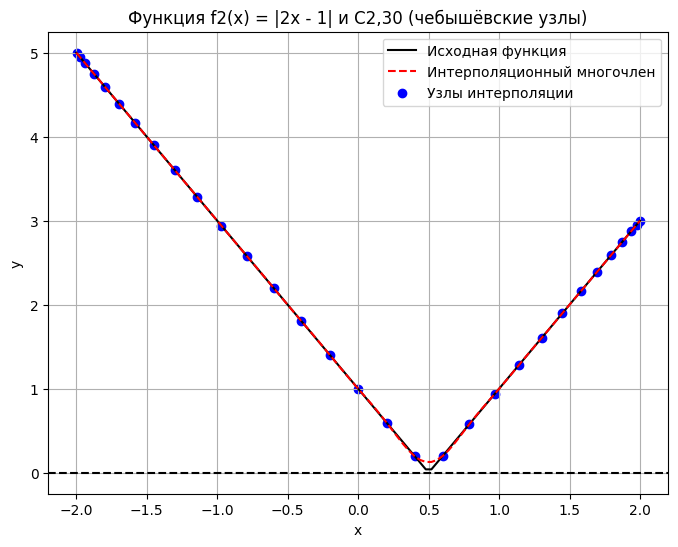

In [89]:
main()